1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline
from scipy import linalg as la

In [3]:
# Generate a dataset simulating 3 features, each with N entries
N = 1000
mean, std =  0 , [1,3]
# x1  is distributed as  N(0,1)
x1 = np.random.normal(loc = mean ,scale = std[0], size = N)
# x2  is distributed as  x1+N(0,3)
x2 = x1 + np.random.normal(loc = mean ,scale = std[1], size = N)
# x3  is given by  2x1+x2
x3 = 2*x1 + x2

print('1) Simulating 3 features x1, x2, x3 \n')
data_set = pd.DataFrame({'x1': x1, 'x2':x2,'x3': x3})
data_set.head()

1) Simulating 3 features x1, x2, x3 



x1        x2        x3
0  0.311326 -0.796849 -0.174198
1 -1.062713  4.511213  2.385787
2 -0.021271 -2.240905 -2.283447
3  1.329338 -1.782907  0.875769
4 -0.362912 -6.077702 -6.803527

In [4]:
# Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov_matrix = np.cov(data_set.T)
Eigen_values, Eigen_vectors = np.linalg.eig(cov_matrix)

print('-'*100 +'\n2) Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix \n')
print(" \n The Eigenvalues :\n ", Eigen_values)
print("\n Eigenvectors as columns :\n",Eigen_vectors )

----------------------------------------------------------------------------------------------------
2) Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix 

 
 The Eigenvalues :
  [2.74316091e+01 1.45877446e-15 2.09453215e+00]

 Eigenvectors as columns :
 [[-0.10813342 -0.81649658  0.56713358]
 [-0.58646053 -0.40824829 -0.69956943]
 [-0.80272736  0.40824829  0.43469773]]


In [6]:
# Find the eigenvectors and eigenvalues using the SVD.
U, spectrum, Vt = np.linalg.svd(data_set.T)
eigen_vals_svd, eigen_vecs_svd = spectrum**2/(N-1), U

Eigen_values, Eigen_vectors = np.linalg.eig(cov_matrix)

# Swaping the colums so I can compare the two methods
eigen_vals_svd[[1,2]] = eigen_vals_svd[[2,1]]
eigen_vecs_svd[:, [1,2]] = eigen_vecs_svd[:, [2,1]]

print('-'*100 +'\n3) Eigenvectors and eigenvalues using SVD\n')
print("Eigenvalues :\n", eigen_vals_svd)
print("Eigenvectors as columns :\n",eigen_vecs_svd)

print("\n So Are the two procedures yield the same Eigenvalues ? : ", np.allclose(Eigen_values, eigen_vals_svd, rtol=1e-03))
print(" Are the two procedures yield the same Eigenvectors ? : ", np.allclose(Eigen_vectors, eigen_vecs_svd, rtol=1e-03))

----------------------------------------------------------------------------------------------------
3) Eigenvectors and eigenvalues using SVD

Eigenvalues :
 [2.74736498e+01 1.09699454e-30 2.09470257e+00]
Eigenvectors as columns :
 [[-0.10819328 -0.81649658  0.56712216]
 [-0.58638668 -0.40824829 -0.69963133]
 [-0.80277324  0.40824829  0.434613  ]]

 So Are the two procedures yield the same Eigenvalues ? :  False
 Are the two procedures yield the same Eigenvectors ? :  True


In [7]:
# What percent of the total dataset's variability is explained by the principal components?
Eigen_values, Eigen_vectors = np.linalg.eig(cov_matrix)

print('-'*100 + '\n4) percent of the total dataset variability is explained by the principal components\n')
Lambda = np.diag(Eigen_values)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov_matrix.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability\n" % (Lambda[2, 2]/Lambda.trace()))

# Given how the dataset was constructed, do these make sense?

print('PCA reduce dimension by:')
print(' 1. Taking linear combinations of the original variables.')
print(' 2. Each linear combination explains the most variance in the data it can.')
print(' 3. Each linear combination is uncorrelated with the other \n')
print('In This case we have 3 features which are correlated already .The third column is just a linear combination of the first two features \n which make sense that variance is explained by just two principal components.')

# Reduce the dimensionality of the system so that at least 99% of the total variability is retained

print('\nPercentage variability of the reduced system: %.2f%%' %(np.sum(Lambda[[0,1]])/Lambda.trace()))


----------------------------------------------------------------------------------------------------
4) percent of the total dataset variability is explained by the principal components

Lambda:
 [[2.74316091e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.45877446e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.09453215e+00]] 

Trace(A):
 29.52614126989954 

Trace(Lambda):
 29.526141269899536 

By selecting the component 0, we retain 0.93% of the total variability
By selecting the component 1, we retain 0.00% of the total variability
By selecting the component 2, we retain 0.07% of the total variability

PCA reduce dimension by:
 1. Taking linear combinations of the original variables.
 2. Each linear combination explains the most variance in the data it can.
 3. Each linear combination is uncorrelated with the other 

In This case we have 3 features which are correlated already .The third column is just a linear combination of the first two features 
 which make sense tha

In [10]:
# Redefine the data according to the new basis from the PCA
print('-'*80 + '\n5) The data redefined according to the new basis from the PCA\n')
data_new = pd.DataFrame(np.dot(Eigen_vectors.T, data_set.T).T, columns=['x1','x2','x3'])
data_new.head()

--------------------------------------------------------------------------------
5) The data redefined according to the new basis from the PCA



x1            x2        x3
0  0.573489 -1.132405e-15  0.658291
1 -4.445870  4.468058e-15 -2.721511
2  3.149487 -4.974668e-16  0.562996
3  0.198855 -4.466711e-15  2.381874
4  9.064953 -6.004487e-16  1.088477

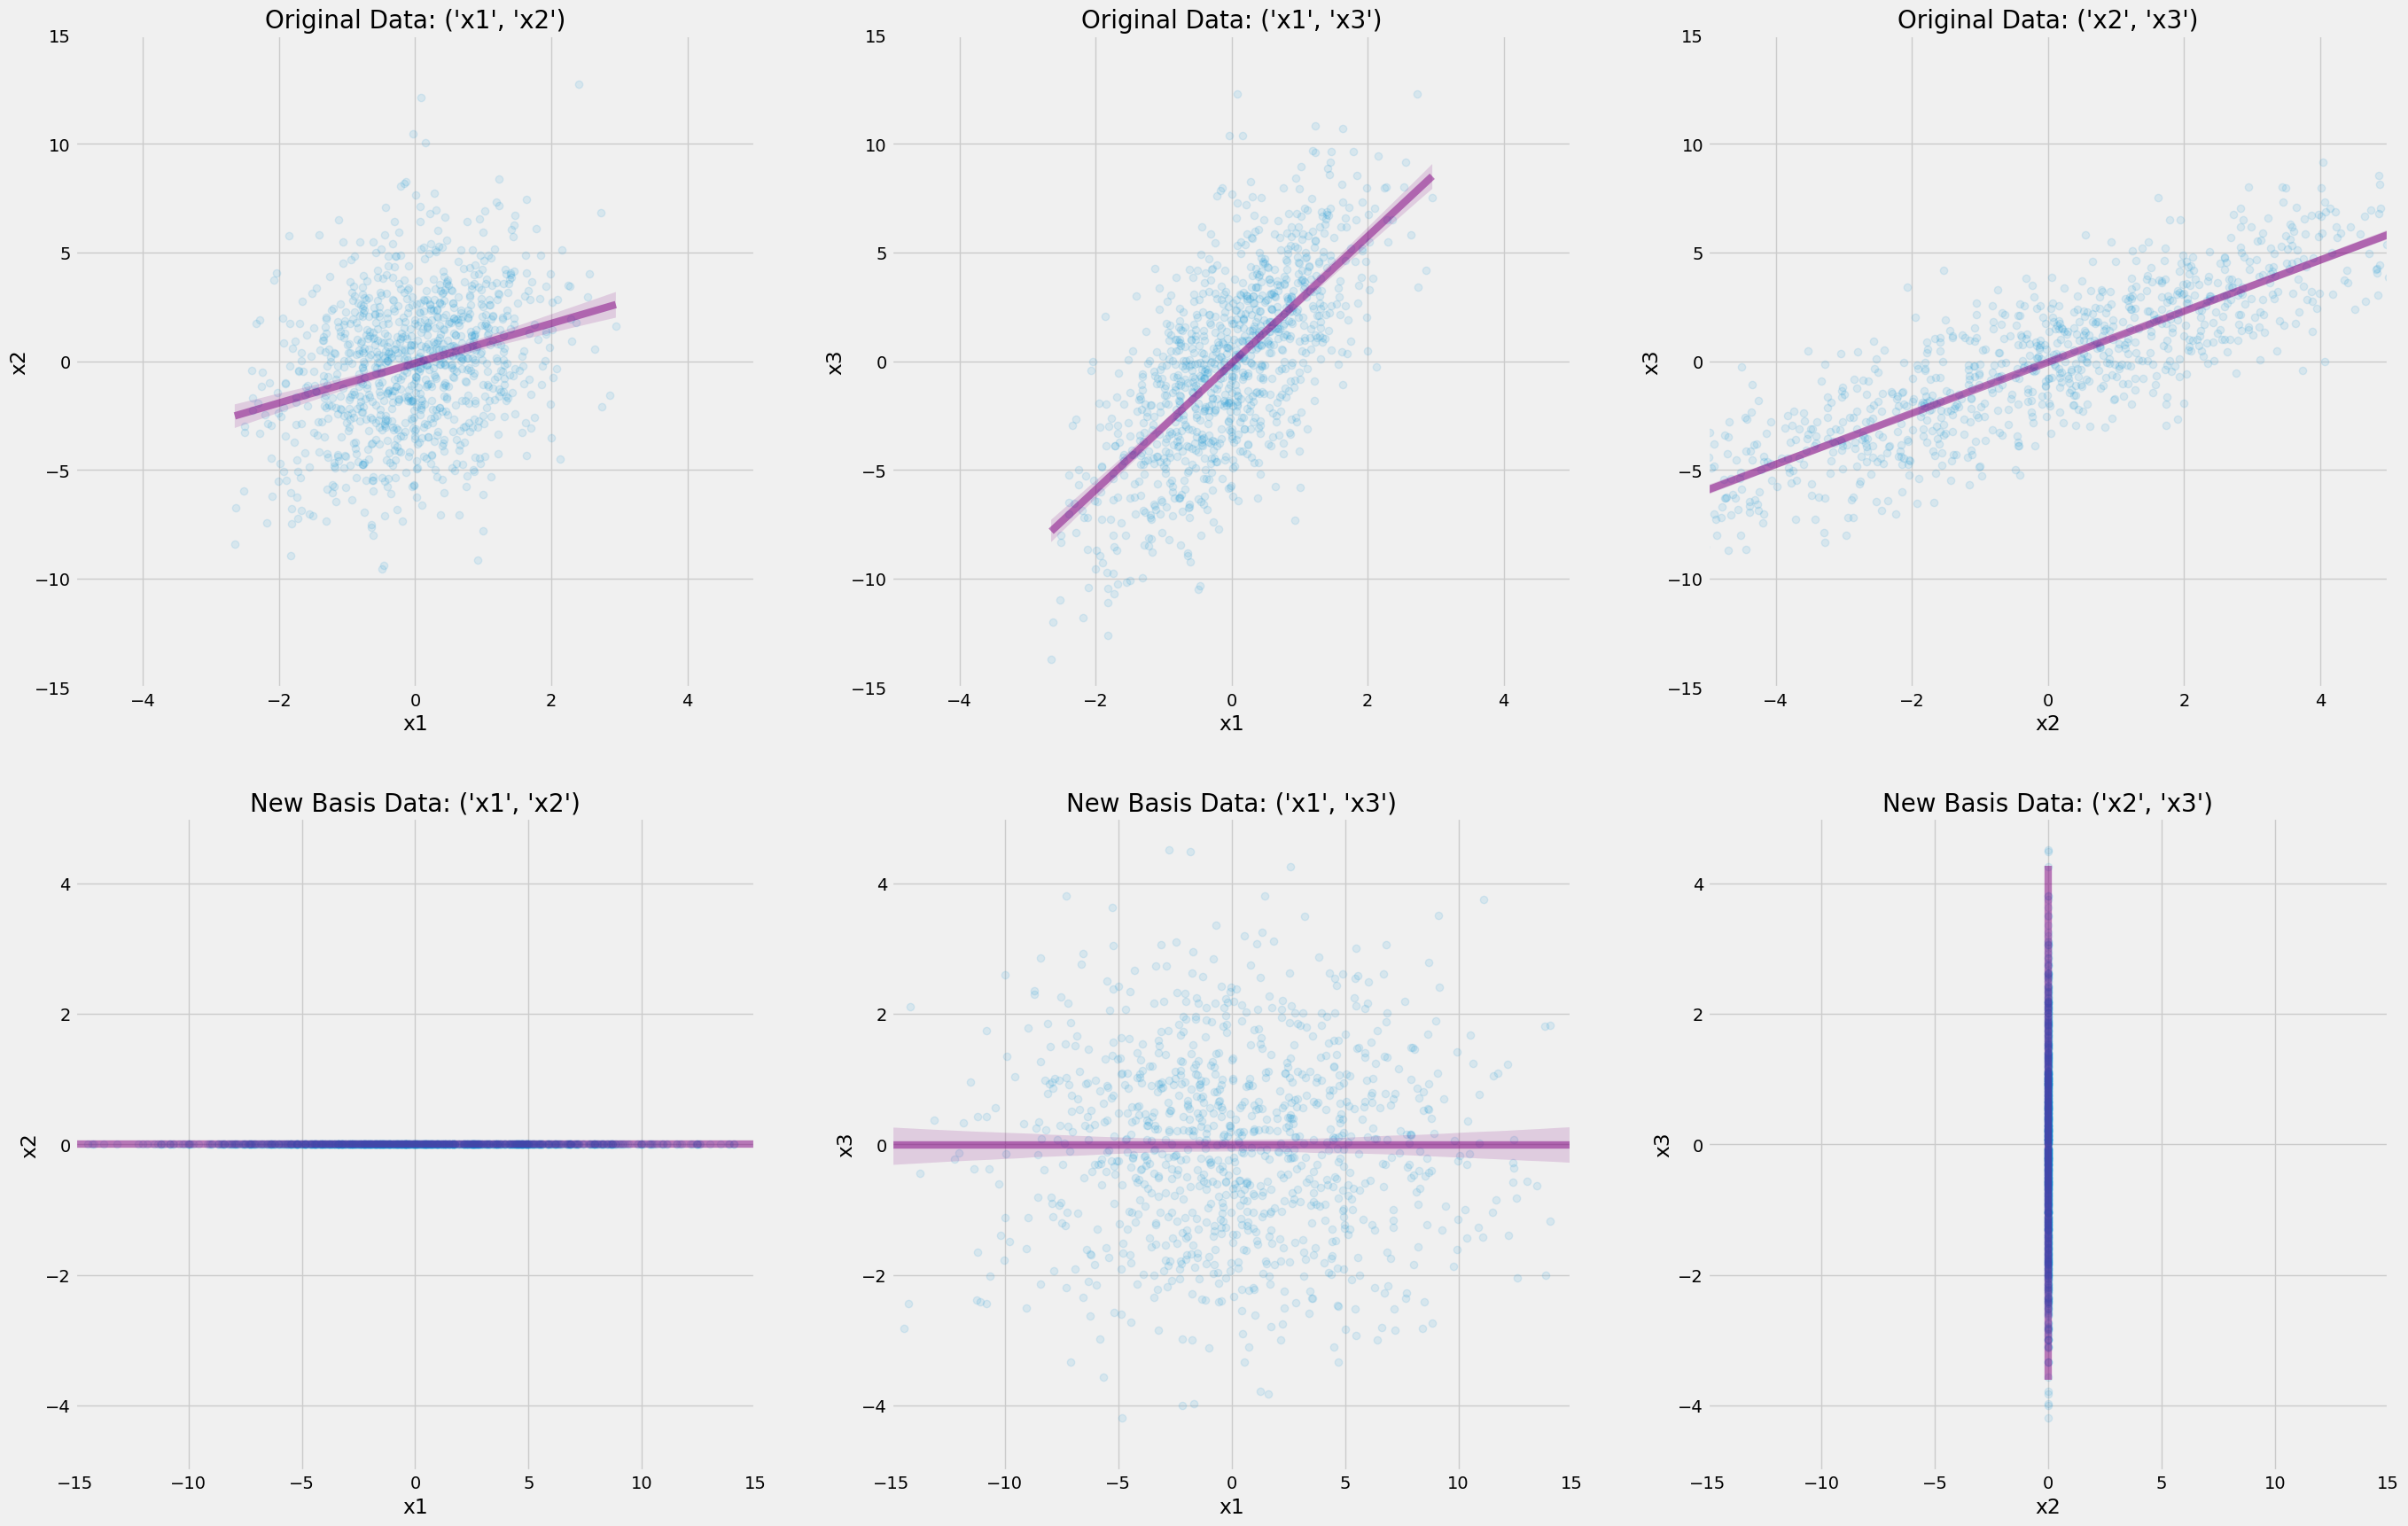

In [12]:
# Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the  [x0,x1] ,  [x0,x2]  and  [x1,x2]  projections) of scatter plots.

fig, axes = plt.subplots(2,3,figsize=(30,20))

col = [('x1','x2'), ('x1','x3'),('x2','x3')]
for i in range(3):
  sns.regplot(data = data_set, x =col[i][0], y = col[i][1], ax = axes[0,i], line_kws={"color": "purple", 'alpha':0.5}, scatter_kws={'alpha':0.1})
  axes[0,i].set_title("Original Data: " + str(col[i]), fontsize=20)
  axes[0,i].axis([-5,5,-15,15])
  sns.regplot(data = data_new, x =col[i][0], y = col[i][1], ax = axes[1,i], line_kws={"color": "purple", 'alpha':0.5}, scatter_kws={'alpha':0.1})
  axes[1,i].set_title("New Basis Data: " + str(col[i]), fontsize=20)
  axes[1,i].axis([-15,15,-5,5])

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [14]:
new_Data = data_set.copy()
noise = np.random.normal(loc = mean, scale=1/20, size=(N,10,3)).sum(axis=1)
new_Data= new_Data + noise
new_Data.head()

x1        x2        x3
0  0.065338 -0.367700 -0.248675
1 -0.855024  4.459246  2.303270
2  0.111015 -2.419915 -2.258418
3  1.185941 -1.814198  0.733141
4 -0.304650 -6.125293 -6.676150

In [16]:
nCov_matrix = np.cov(new_Data.T)
eigen_vals, eigen_vecs = np.linalg.eig(nCov_matrix)

print('-'*80 +'\n2) Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix\n')
print("Eigenvalues :\n", eigen_vals)
print("Eigenvectors as columns :\n",eigen_vecs )


U, spectrum, Vt = np.linalg.svd(nData.T)
eigen_vals_svd, eigen_vecs_svd = spectrum.copy()**2/(N - 1), U.copy()

# Swaping the colums so I can compare the two methods
eigen_vals_svd[[1,2]] = eigen_vals_svd[[2,1]]
eigen_vecs_svd[:, [1,2]] = eigen_vecs_svd[:, [2,1]]

print('-'*80 +'\n3) Eigenvectors and eigenvalues using SVD\n')
print("Eigenvalues :\n", eigen_vals_svd)
print("Eigenvectors as columns :\n",eigen_vecs_svd)

--------------------------------------------------------------------------------
2) Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

Eigenvalues :
 [2.74234312e+01 2.59974699e-02 2.13016509e+00]
Eigenvectors as columns :
 [[-0.10834633 -0.81585449  0.56801631]
 [-0.58685982 -0.40870248 -0.69896912]
 [-0.80240677  0.40907669  0.4345108 ]]
--------------------------------------------------------------------------------
3) Eigenvectors and eigenvalues using SVD

Eigenvalues :
 [2.74479031e+01 2.59098083e-02 2.10674668e+00]
Eigenvectors as columns :
 [[-0.10665332 -0.81920385  0.56349812]
 [-0.58757421 -0.40526086 -0.70037146]
 [-0.80211072  0.4057939   0.43812064]]


In [17]:
# What percent of the total dataset's variability is explained by the principal components?

print('-'*80 + '\n4) percent of the total dataset variability is explained by the principal components\n')
Lambda = np.diag(spectrum)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", nCov_matrix.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability\n" % (Lambda[2, 2]/Lambda.trace()))

# Reduce the dimensionality of the system so that at least 99% of the total variability is retained

print('\nPercentage variability of the reduced system: %.5f%%' %(np.sum(Lambda[[0,1]])/Lambda.trace()))

--------------------------------------------------------------------------------
4) percent of the total dataset variability is explained by the principal components

Lambda:
 [[165.59122931   0.           0.        ]
 [  0.          45.87635479   0.        ]
 [  0.           0.           5.08762209]] 

Trace(A):
 29.57959372770815 

Trace(Lambda):
 216.55520618949697 

By selecting the component 0, we retain 0.76% of the total variability
By selecting the component 1, we retain 0.21% of the total variability
By selecting the component 2, we retain 0.02% of the total variability


Percentage variability of the reduced system: 0.97651%


PCA is a linear technique, it is sensitive to the noise, as it projects the data onto a new coordinate system based on the covariance matrix of the data. The noise will add random variation to the covariance matrix, which can affect the calculation of the principal components and the amount of variance they explain.

The principal components will still be the directions of maximum variance, but the amount of variance explained by each principal component will be affected by the noise. As a result, the transformed data may be more spread out or more clustered than expected.

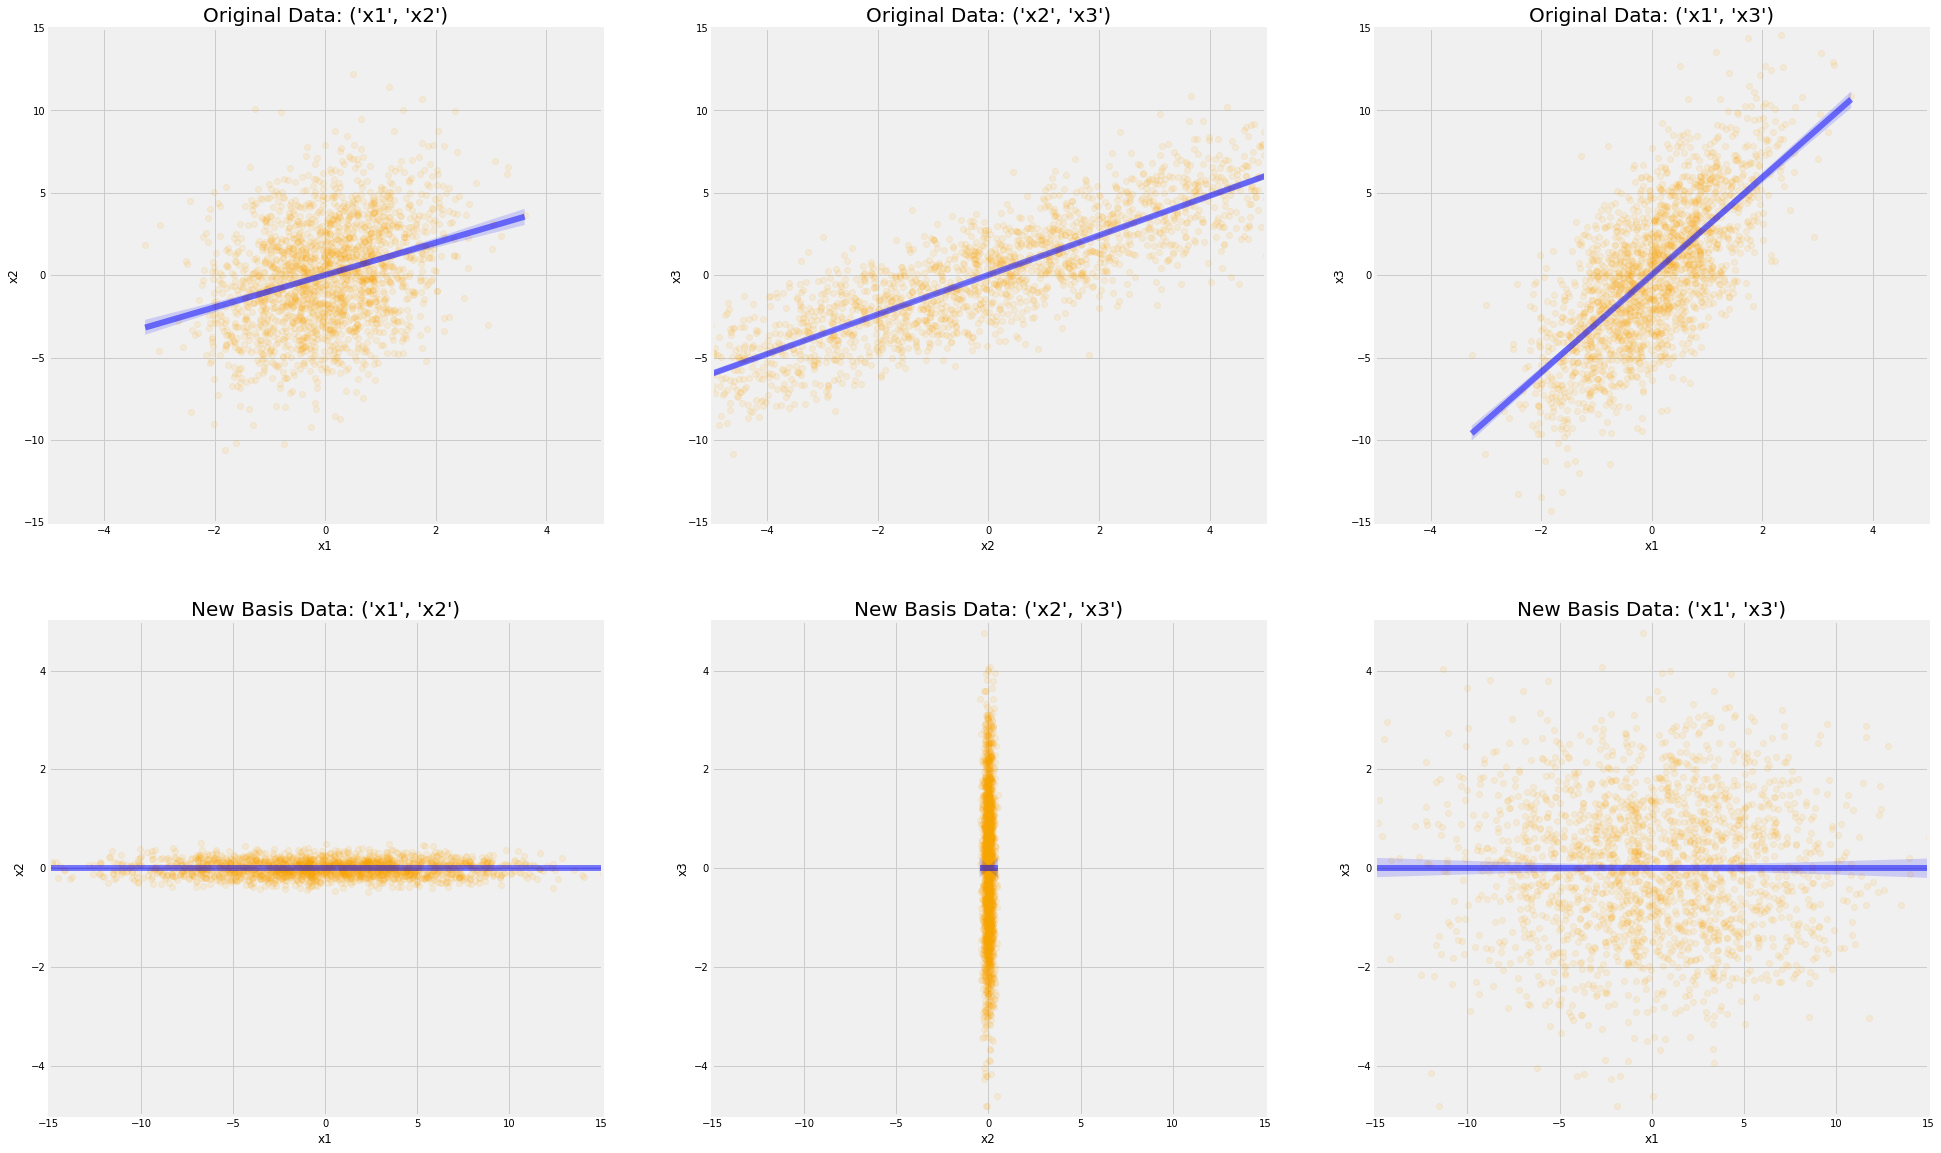

In [ ]:
# Redefine the data according to the new basis from the PCA
nData_new = pd.DataFrame(np.dot(eigen_vecs.T, nData.T).T, columns=['x1','x2','x3'])
fig, axes = plt.subplots(2,3,figsize=(30,20))

col = [('x1','x2'),('x2','x3'), ('x1','x3')]
for i in range(3):
  sns.regplot(data = nData, x =col[i][0], y = col[i][1], ax = axes[0,i], line_kws={"color": "blue", 'alpha':0.5}, scatter_kws={'alpha':0.1, "color": "orange"})
  axes[0,i].set_title("Original Data: " + str(col[i]), fontsize=20)
  axes[0,i].axis([-5,5,-15,15])
  sns.regplot(data = nData_new, x =col[i][0], y = col[i][1], ax = axes[1,i], line_kws={"color": "blue", 'alpha':0.5}, scatter_kws={'alpha':0.1, "color": "orange"})
  axes[1,i].set_title("New Basis Data: " + str(col[i]), fontsize=20)
  axes[1,i].axis([-15,15,-5,5])

adding uncorrelated random noise did not have a significant effect on the resulting principal components. This is because PCA operates by finding the directions of maximum variance in the data, and the presence of uncorrelated noise will not affect the overall patterns or relationships in the correlated features. However, the noise may increase the overall variance of the dataset, which could lead to the principal components having slightly higher eigenvalues, but the overall structure of the principal components will remain the same.

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [18]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/

--2024-01-15 13:52:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data/magic04.data’

magic04.data            [  <=>               ]   1.41M  4.74MB/s    in 0.3s    

2024-01-15 13:52:55 (4.74 MB/s) - ‘data/magic04.data’ saved [1477391]

--2024-01-15 13:52:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data/magic04.names’

magic04.names           [ <=>                ]   5.27K  --.-KB/s    in 0s      

2024-01-15 13:52:55 (67.2 MB/s) - ‘data/mag

In [19]:
!cat /content/data/magic04.names

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

In [22]:
file_name="/content/data/magic04.data"
data_optionel=pd.read_csv(file_name,nrows=2000)
data_optionel.columns=['Length','Width','Size','fConc','Conc1','Asym', 'M3Long','M3Trans','Alpha','Dist','class']
data_optionel.drop(columns=['class'], inplace=True)
data_optionel.head()

Length     Width    Size   fConc   Conc1      Asym   M3Long  M3Trans  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887   9.8145   

     Alpha     Dist  
0   6.3609  205.261  
1  76.9600  256.788  
2  10.4490  116.737  
3   4.6480  356.462  
4   3.6130  238.098

In [23]:
Cov_matrix = np.cov(data.T)
eigen_vals, eigen_vecs = np.linalg.eig(Cov_matrix)

print('-'*80 +'\n2) Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix\n')
print("Eigenvalues :\n", eigen_vals)
U, spectrum, Vt = np.linalg.svd(data)
eigen_vals_svd, eigen_vecs_svd = spectrum**2/(2000 -1), U
eigen_vals_svd[[1,2]] = eigen_vals_svd[[2,1]]
eigen_vecs_svd[:, [1,2]] = eigen_vecs_svd[:, [2,1]]
print('-'*80 +'\n3) Eigenvectors and eigenvalues using SVD\n')
print("Eigenvalues :\n", eigen_vals_svd)


--------------------------------------------------------------------------------
2) Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

Eigenvalues :
 [5.49211180e+03 1.69646706e+03 9.68123830e+02 3.69494393e+02
 2.40239882e+02 1.80354696e+02 3.59792244e+01 4.30203538e-02
 8.72735821e-03 3.28661765e-04]
--------------------------------------------------------------------------------
3) Eigenvectors and eigenvalues using SVD

Eigenvalues :
 [4.41128028e+04 1.11012283e+03 1.71552146e+03 5.27239784e+02
 2.71582368e+02 1.80750945e+02 3.86616566e+01 3.27317151e-01
 1.98855741e-02 3.68536222e-04]


In [24]:
# What percent of the total dataset's variability is explained by the principal components?

print('-'*80 + '\n4) percent of the total dataset variability is explained by the principal components\n')
Lambda = np.diag(eigen_vals)
print("Trace(A):\n", Cov_matrix.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

for i in range(len(Lambda)):
  print("By selecting the component" ,i, " we retain %.2f%% of the total variability" % (Lambda[i, i]/Lambda.trace()))

print('\nPercentage variability of the reduced system: %.2f%% , Explained by 6 Features' %(np.sum(Lambda[[0,1,2,3,5]])/Lambda.trace()))

--------------------------------------------------------------------------------
4) percent of the total dataset variability is explained by the principal components

Trace(A):
 8982.822963041537 

Trace(Lambda):
 8982.822963041543 

By selecting the component 0  we retain 0.61% of the total variability
By selecting the component 1  we retain 0.19% of the total variability
By selecting the component 2  we retain 0.11% of the total variability
By selecting the component 3  we retain 0.04% of the total variability
By selecting the component 4  we retain 0.03% of the total variability
By selecting the component 5  we retain 0.02% of the total variability
By selecting the component 6  we retain 0.00% of the total variability
By selecting the component 7  we retain 0.00% of the total variability
By selecting the component 8  we retain 0.00% of the total variability
By selecting the component 9  we retain 0.00% of the total variability

Percentage variability of the reduced system: 0.97% , E

In [27]:
data_new = pd.DataFrame(np.dot(eigen_vecs.T, data_optionel.T).T, columns=data_optionel.columns)
data_new.drop(columns=['M3Long','M3Trans','Alpha','Dist'], inplace=True)
data_cl = data_optionel.drop(columns=['M3Long','M3Trans','Alpha','Dist'])
data_new.head()

Length      Width        Size      fConc       Conc1       Asym
0 -200.149211 -35.595827  -45.435610 -32.836324   -9.902071   9.539938
1 -250.079463 -91.891242 -120.388601 -19.040830 -210.640203  15.975173
2 -109.367868 -22.614280  -44.891588 -16.146899  -21.348554   4.652545
3 -358.076989 -13.967886  -58.507401 -41.585829  -26.901857 -24.575716
4 -236.965834 -68.457916  -43.949929 -33.705274  -16.923328 -11.618805

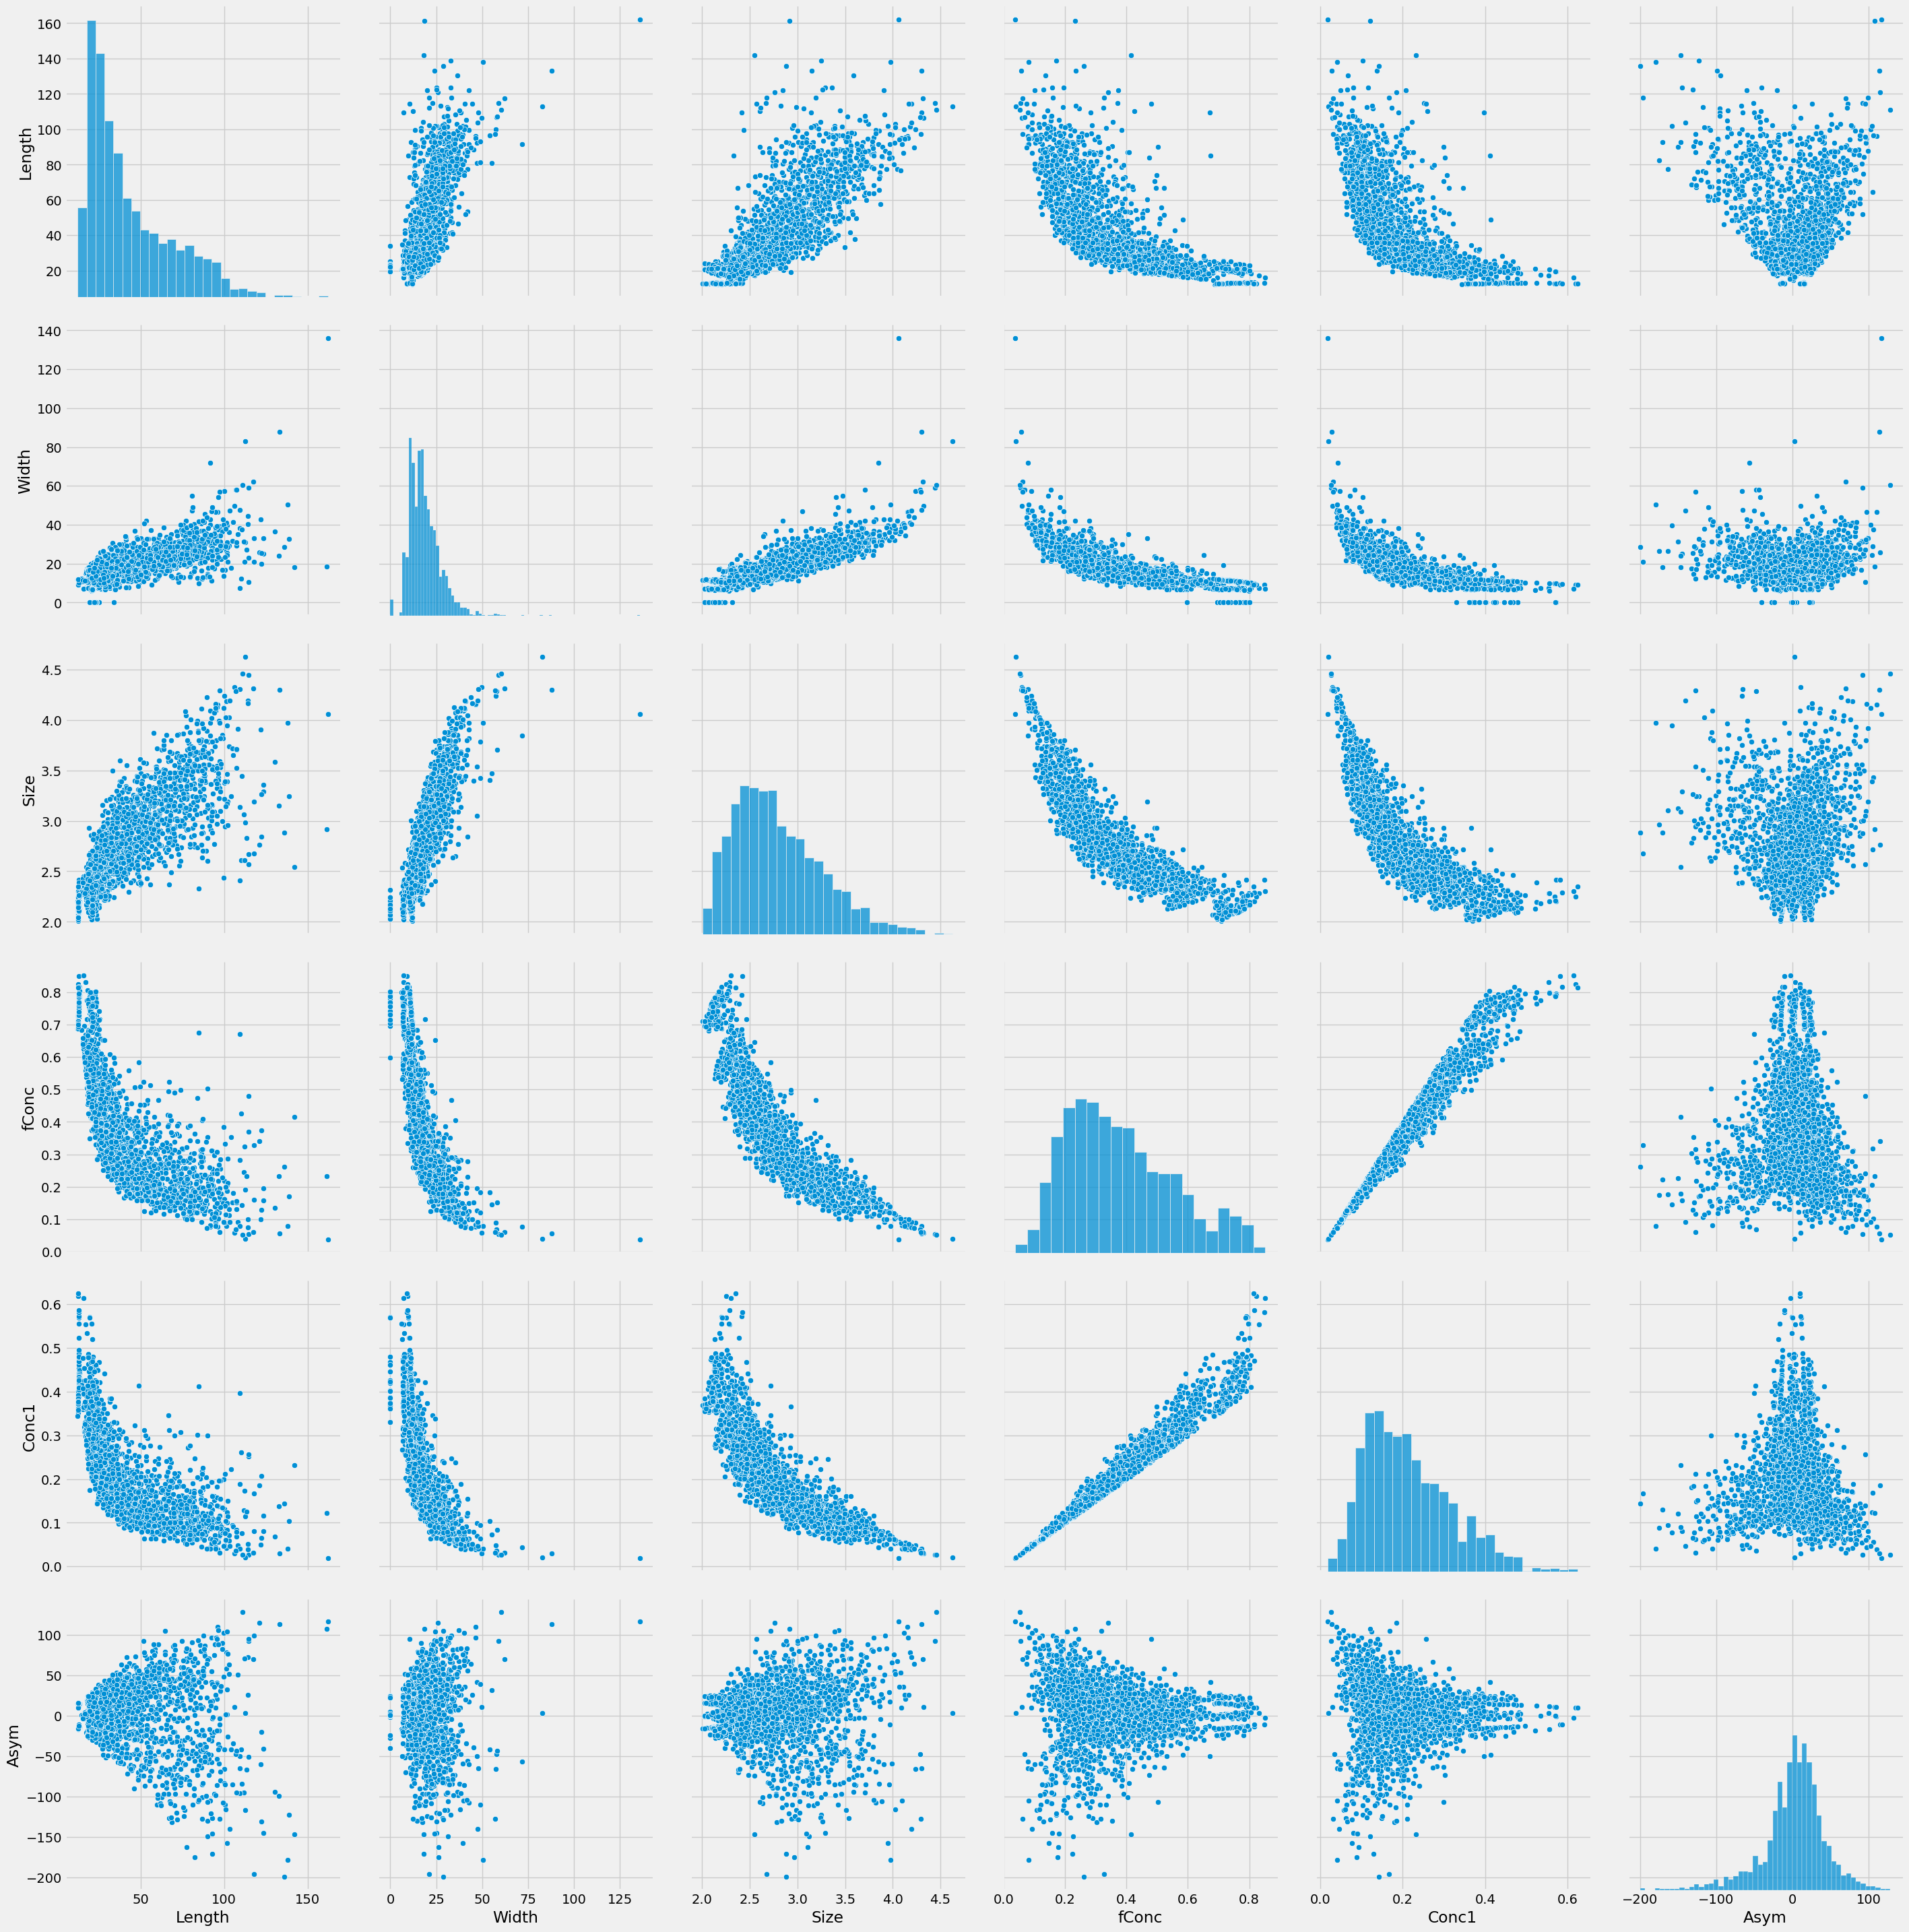

In [28]:
g = sns.pairplot(data_cl)
g.fig.set_figwidth(30)
g.fig.set_figheight(30)

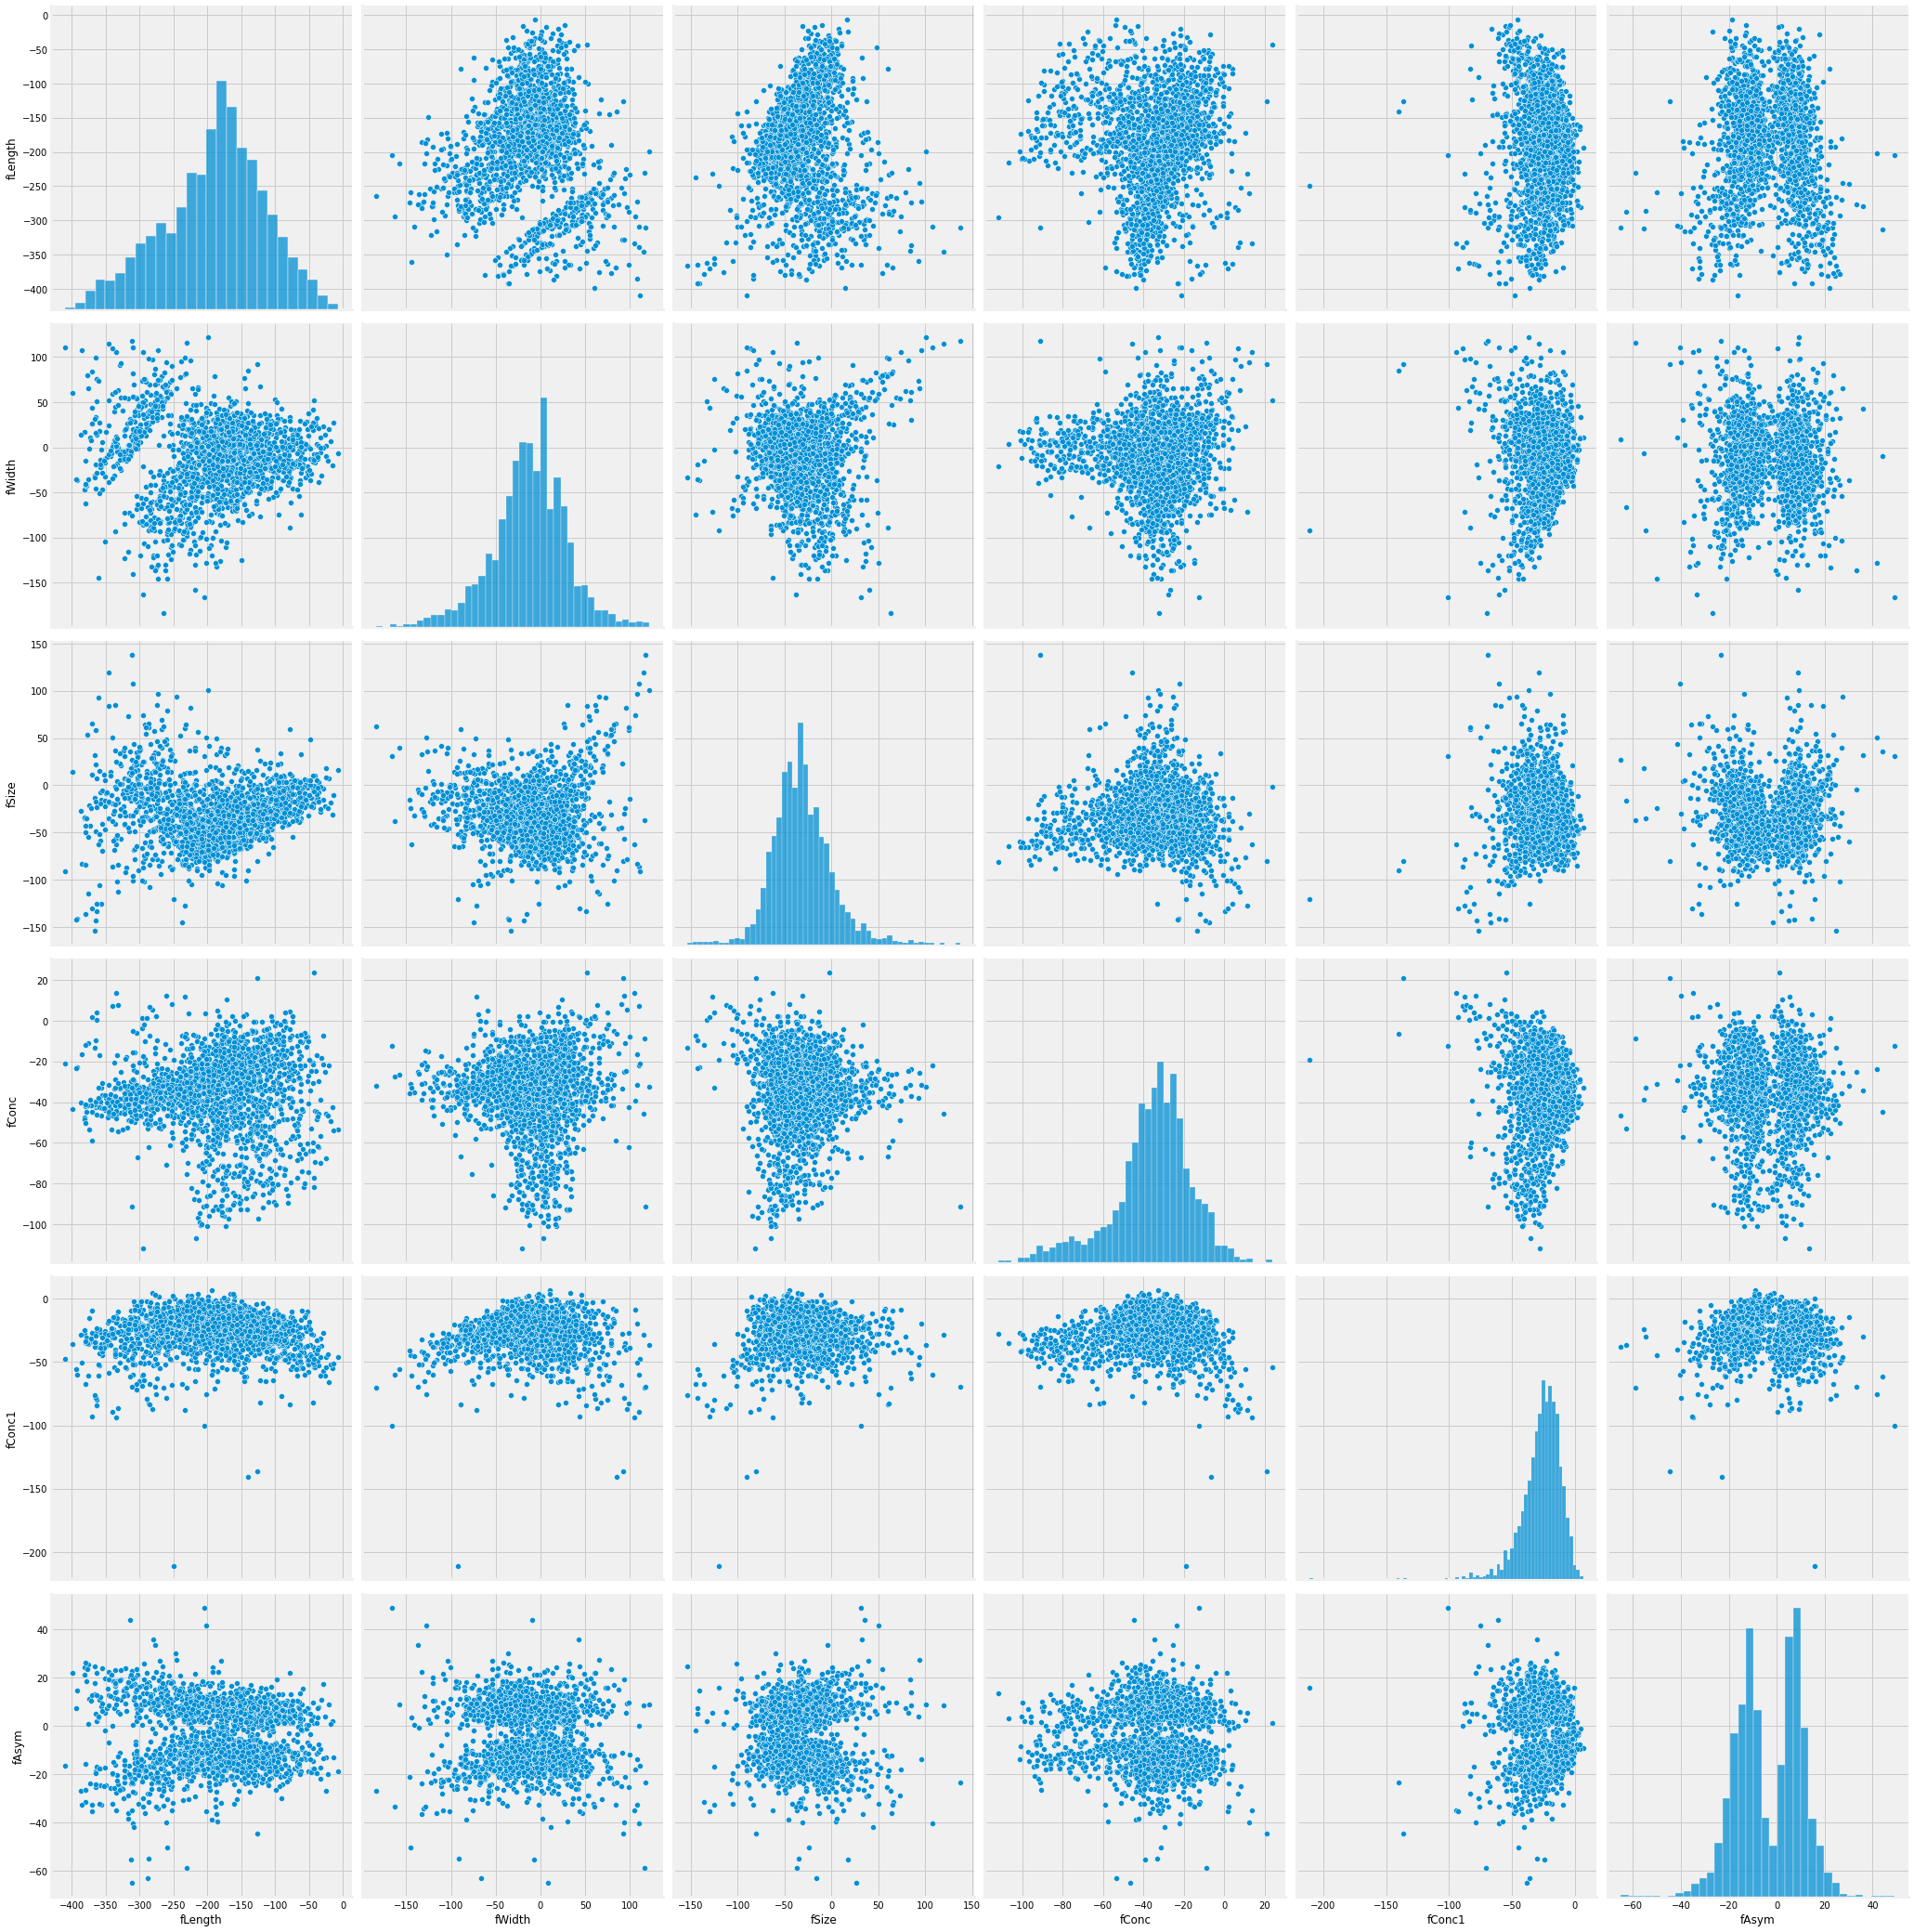

In [ ]:
g = sns.pairplot(data_new)
g.fig.set_figwidth(30)
g.fig.set_figheight(30)

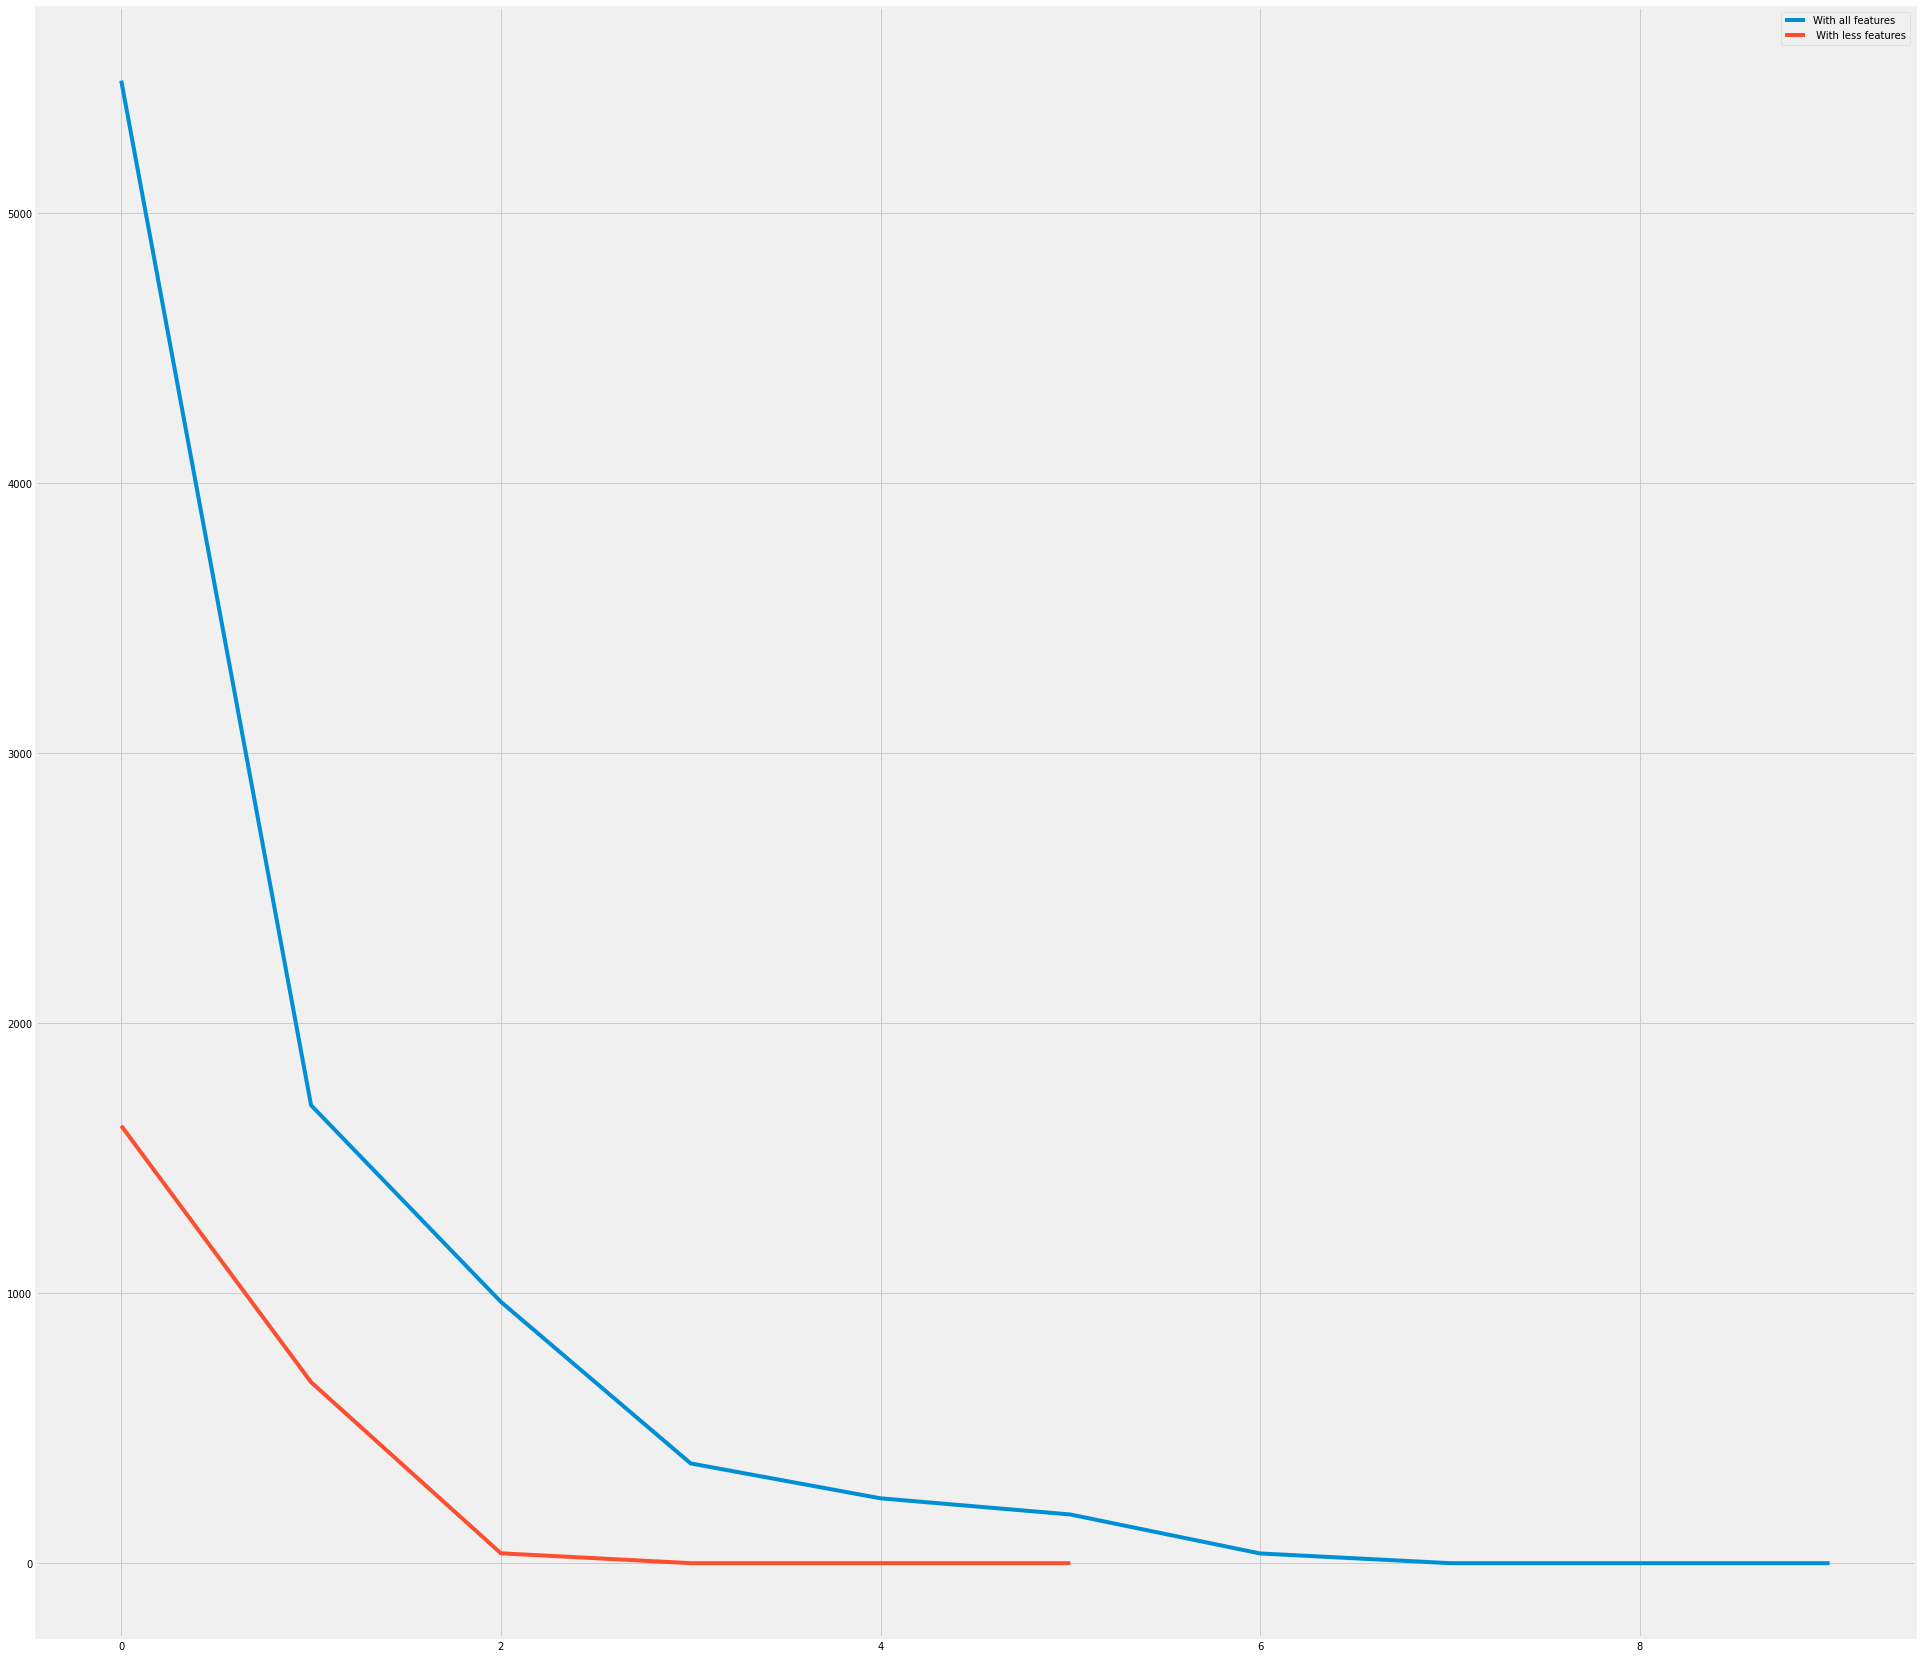

In [ ]:
plt.figure(figsize=(30,30))

for x in [data, data_cl ]:
  X = x.values.T
  l, V = np.linalg.eig(np.cov(X))
  plt.plot(l)
  plt.legend(['With all features', ' With less features'])

the eigenvalue with the largest value corresponds to the eigenvector that explains the most amount of variability in the data. The larger the gap between the largest eigenvalue and the second largest eigenvalue, the more the first eigenvector explains the variability in the data.